### Requirments

New version of comut is needed for scatter plot. They way to install is:

<code>
pip uninstall comut

pip install git+https://github.com/yelingqun/comut.git
</code>

### library and functions

In [1]:

def plot_categorical(comut, data, name, column, mapping = None):
    data = data.copy()
    data['category'] = name
    data['value'] = data[column]
    comut.add_categorical_data(data, name = name, mapping = mapping)

def plot_continuous(comut, data, name, column, mapping, cat_mapping, value_range):
    data = data.copy()
    data['category'] = name
    data['value'] = data[column]
    comut.add_continuous_data(data, name = name, mapping = mapping, cat_mapping = cat_mapping, value_range = value_range)

def plot_bar(comut, data, name, columns, mapping=None):
    data = data.copy()
    data = data[['sample']+columns]
    comut.add_bar_data(data, stacked = True, name = name, ylabel = name, mapping=mapping)
    
def plot_scatter(comut, data, name, columns, mapping=None, scatter_kwargs=None):
    data = data.copy()
    data = data[['sample']+columns]
    comut.add_scatter_data(data, stacked = True, name = name, ylabel = name, mapping=mapping, scatter_kwargs=scatter_kwargs)


In [2]:
import pandas as pd
import numpy as np
import palettable
import matplotlib.pyplot as plt
import matplotlib
from comut import comut

In [15]:
#save and road data

def save_data():
    data = pd.read_csv('../meta/meta_catalyst-main_07_17.csv')
    genes_mutect2 = pd.read_csv('../results/figure_comut/comut_driver_genes_mutect2_snv.csv')
    genes_purple = pd.read_csv('../results/figure_comut/comut_driver_genes_l075.csv')
    driver_genes_cnv = pd.read_csv('../results/figure_comut/comut_genes_wgs_v2.csv')
    chr = pd.read_csv('../results/figure_comut/comut_chr_wgs.csv')
    complex_sv = pd.read_csv('../results/figure_comut/comut_complex_sv.csv')
    data_mut_sig = pd.read_csv('../meta/mut_sigs.csv')

    data.to_csv('tmp/meta_catalyst-main_07_17.csv', index=False)
    genes_mutect2.to_csv('tmp/comut_driver_genes_mutect2_snv.csv', index=False)
    genes_purple.to_csv('tmp/comut_driver_genes_l075.csv', index=False)
    driver_genes_cnv.to_csv('tmp/comut_genes_wgs_v2.csv', index=False)
    chr.to_csv('tmp/comut_chr_wgs.csv', index=False)
    complex_sv.to_csv('tmp/comut_complex_sv.csv', index=False)
    data_mut_sig.to_csv('tmp/mut_sigs.csv', index=False)

#save_data()

#load
data = pd.read_csv('../ms/table_s2_comut_plot_summary.csv')
neoloop = pd.read_csv('../meta/meta_catalyst-main_v1.0_12_06.csv') #?
genes_mutect2 = pd.read_csv('../results/figure_comut_v2/comut_driver_genes_mutect2_snv.csv') #
genes_purple = pd.read_csv('../results/figure_comut_v2/comut_driver_genes_l075.csv') #
driver_genes_cnv = pd.read_csv('../results/figure_comut_v2/comut_genes_wgs.csv') #
chr = pd.read_csv('../results/figure_comut_v2/comut_chr_wgs.csv') #
complex_sv = pd.read_csv('../results/figure_comut_v2/comut_complex_sv.csv') #
data_mut_sig = pd.read_csv('../meta/mut_sigs_012225.csv') #from kate
#svlen = pd.read_csv('tmp/sv_filtered_svlen_mean.csv')
#svlen = svlen[svlen['type']=='wgs'][['sample_id', 'svlen']]
#svlen['svlen'] = svlen['svlen']/1000000
#data = pd.merge(data, svlen, on='sample_id')

### Main

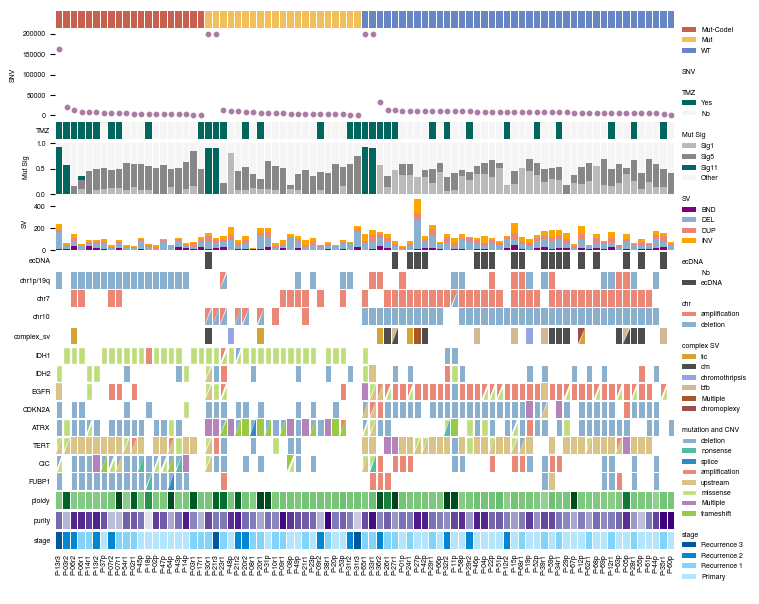

In [ ]:
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors

#data = pd.read_csv('../meta/meta_catalyst-main_07_17.csv')
data = data[data['WGS-Blacklisted']=="n"]
data['sample'] = data['sample_id']
data["IDH"] = data["IDH"].astype("category")
data.IDH = pd.Categorical(data.IDH, 
                    categories=['Mut-Codel', 'Mut', 'WT'],
                    ordered=True)
data.sort_values(by=['IDH', 'snv_overlap'], ascending=[True,False], inplace=True)
data['snv_overlap'] = data['snv_overlap'].clip(upper=200_000)
#adjust ploidy and purity of saved sample 235860-WG01 to mean(purple+facet)
data.loc[data['sample_id']=='P-18p','ploidy_ascat']=(data.loc[data['sample_id']=='P-18p','ploidy_facets'] + data.loc[data['sample_id']=='P-18p','ploidy_purple'] )/2
data.loc[data['sample_id']=='P-18p','purity_ascat']=(data.loc[data['sample_id']=='P-18p','purity_facets'] + data.loc[data['sample_id']=='P-18p','purity_purple'] )/2
#data_svlen = pd.merge(data, svlen, on='sample_id')

comut1 = comut.CoMut()


#Primary & R1 & R2 & R3
plot_categorical(comut1, data, "stage",'Type', mapping={'Primary':'#B3E5FC', 'Recurrence 1':'#81D4FA', 'Recurrence 2':'#0288D1', 'Recurrence 3':'#01579B'})



#Purity & Ploidy
cat_mapping = {'Absent': {'facecolor': 'red'}}
plot_continuous(comut1, data, 'purity', ['purity_ascat'], mapping='Purples', cat_mapping = cat_mapping, value_range = (0, 1))
plot_continuous(comut1, data, 'ploidy', ['ploidy_ascat'], mapping='Greens', cat_mapping = cat_mapping, value_range = (0, 4))

#Driver genes
def plot_snv_and_cnv(comut1, data, genes_mutect2, genes_purple, driver_genes_cnv):
    vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors

    # snv used purple & mutect2
    # gene_list = ['TP53', 'IDH1', 'IDH2', 'PTEN', 'ATRX', 'EGFR', 
    #                 'NF1', 'TERT', 'PIK3CA', 'CIC', 'RB1', 'PIK3R1', 'FUBP1',
    #                 'CDKN2A', 'PDGFRA', 'CDK4', 'CDK6', 'MDM2', 'MET',
    #                 'CCND2', 'MYCN', 'MDM4']

    gene_list = ['IDH1','IDH2','EGFR','CDKN2A','ATRX','TERT','CIC','FUBP1']
    
    #genes_mutect2 = pd.read_csv('../results/figure_comut/comut_driver_genes_mutect2_snv.csv')
    #genes_purple = pd.read_csv('../results/figure_comut/comut_driver_genes_l075.csv')
    driver_genes_mut = pd.concat([genes_mutect2, genes_purple])
    driver_genes_mut = driver_genes_mut.drop_duplicates()
    
    driver_genes_mut['wgs_seq_id'] = driver_genes_mut['sample']
    driver_genes_mut = pd.merge(driver_genes_mut[['wgs_seq_id', 'category', 'value']], 
            data[['sample', 'wgs_seq_id']], on='wgs_seq_id')
    driver_genes_mut = driver_genes_mut[~driver_genes_mut['value'].isin(['amplification', 'inframe', 'deletion'])]
    
    
    driver_genes_cnv['wgs_seq_id'] = driver_genes_cnv['sample']
    driver_genes_cnv = pd.merge(driver_genes_cnv[['wgs_seq_id', 'category', 'value']], 
        data[['sample', 'wgs_seq_id']], on='wgs_seq_id')

    driver_genes = pd.concat([driver_genes_mut, driver_genes_cnv])
    # get the genes in the list and sort as the list
    driver_genes = driver_genes[driver_genes['category'].isin(gene_list)]
    driver_genes.sort_values(by="category", key=lambda column: column.map(lambda e: gene_list.index(e)), inplace=True, ascending=False)

    driver_genes = driver_genes[driver_genes['value'].notnull()]

    mut_mapping = {'missense': {'facecolor':'#BCDD78','edgecolor': 'white'}, 'upstream': '#DAC386', 'Multiple':'#B383B9',
                    'nonsense': vivid_10[2], 'frameshift': vivid_10[3], 'inframe_insertion': vivid_10[4],
                    'inframe_deletion': vivid_10[5], 'splice': vivid_10[7],
                    'deletion': {'facecolor':'#8AB0D0', 'edgecolor': 'white', 'linewidth': 0.75},
                    'amplification': {'facecolor':'#EB8777', 'edgecolor': 'white', 'linewidth': 0.75}}
    
    #cnv used ascat
    comut1.add_categorical_data(driver_genes, name = "mutation and CNV", mapping = mut_mapping)

plot_snv_and_cnv(comut1, data, genes_mutect2, genes_purple, driver_genes_cnv)

#neoloop
neoloop = neoloop[neoloop['WGS-Blacklisted']=="n"]
neoloop['sample'] = neoloop['sample_id']
#plot_bar(comut1, neoloop, "neoloop", ["neoloop_eaglec_ice"], mapping={'neoloop_eaglec_ice': '#00CDAB'})

complex_sv1 = complex_sv.copy()
complex_sv1['wgs_seq_id'] = complex_sv1['sample']
complex_sv1 = pd.merge(complex_sv1[['wgs_seq_id', 'category', 'value']], 
        data[['sample', 'wgs_seq_id']], on='wgs_seq_id')
complex_sv1 = complex_sv1[complex_sv1['value'].notnull()]
comut1.add_categorical_data(complex_sv1, name='complex SV', mapping={'tic': '#D2A433', 'dm':'#4d4d4d', 'chromothripsis':'#94A4E7', 'bfb':'#D2B896', 'chromoplexy':'#9F4C4D'})

#chromosome CNV
cna_mapping = {'amplification': '#EB8777', 'deletion': '#8AB0D0'}
chr_list = ['chr1p/19q', 'chr7', 'chr10']
#chr = pd.read_csv('../results/figure_comut/comut_chr_wgs.csv')
chr1 = chr.copy()
chr1['wgs_seq_id'] = chr1['sample']
chr1 = pd.merge(chr1[['wgs_seq_id', 'category', 'value']], 
        data[['sample', 'wgs_seq_id']], on='wgs_seq_id')
chr1 = chr1[chr1['value'].notnull()]
chr1 = chr1[chr1['category'].isin(chr_list)]
chr1.sort_values(by="category", key=lambda column: column.map(lambda e: chr_list.index(e)), inplace=True, ascending=False)
comut1.add_categorical_data(chr1, name='chr', mapping = cna_mapping)

#SV
plot_categorical(comut1, data, "ecDNA",'ecDNA', mapping={'ecDNA':"#4d4d4d",'No':'#ffffff'})
plot_bar(comut1, data, 'SV', ['BND',"DEL","DUP","INV"], mapping={'BND': 'purple', 'DEL':'#8AB0D0', 'DUP':'#EB8777', 'INV':'orange'})


#SNV
data_mut_sig1 = data_mut_sig.merge(data[['sample', 'wgs_seq_id']], left_on='wgs_seq_id', right_on='wgs_seq_id')
plot_bar(comut1, data_mut_sig1, 'Mut Sig', ['Sig1', 'Sig5', 'Sig11', 'Other'],mapping={'Sig11':'#01665e','Sig1':'#bababa','Sig5':'#878787','Other':'#f5f5f5'})
plot_categorical(comut1, data, "TMZ",'TMZ treated before', mapping={'Yes': '#01665e', 'No':'#f5f5f5'})
plot_scatter(comut1, data, 'SNV', ['snv_overlap'], mapping={'snv_overlap': '#ab7ca3'}, scatter_kwargs={'s':10})

#IDH types
plot_categorical(comut1, data, "",'IDH', mapping={'Mut-Codel':'#C86050', 'Mut':'#F3BF5A', 'WT':'#6685c2'})

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size': 5})
#Show plot
heights = {'SNV': 5}
hspace = 0.04
wspace = 0.04
comut1.plot_comut(figsize = (8,7),  x_padding = 0.067, y_padding = 0.02, tri_padding = 0.03, heights=heights,
                hspace = hspace, 
                wspace= wspace)
comut1.add_unified_legend(ncol = 1)
comut1.figure.savefig('figures/1a_comut.pdf', bbox_inches = 'tight')

